#¿Qué es el Cálculo Estocástico y por qué importa en Finanzas?

En el mundo real, casi nada se mueve de manera perfectamente predecible… y esto es especialmente cierto en los mercados financieros. Los precios de las acciones, las tasas de interés, los tipos de cambio o incluso el precio de una criptomoneda fluctúan de manera aleatoria, influidos por miles de factores que no podemos controlar.

Para describir y trabajar con ese comportamiento incierto, utilizamos una rama de las matemáticas llamada Cálculo Estocástico.

🎲 ¿Qué es el Cálculo Estocástico?

El cálculo estocástico es un conjunto de herramientas matemáticas diseñadas para estudiar procesos que evolucionan con cierto grado de azar. A diferencia del cálculo tradicional (donde todo es suave y determinista), aquí trabajamos con caminos que son irregulares, ruidosos y llenos de incertidumbre.

La idea central es:
si los mercados se mueven con aleatoriedad, nuestras ecuaciones también deben incorporar esa aleatoriedad.

💹 ¿Por qué es tan importante en Finanzas?

El cálculo estocástico es la base de muchos modelos modernos del mundo cuantitativo. Nos permite:

✅ 1. Modelar precios de activos

Por ejemplo, el famoso Movimiento Browniano Geométrico (GBM), que se utiliza para describir cómo puede evolucionar el precio de una acción a lo largo del tiempo.

✅ 2. Valuar opciones y derivados

Modelos como Black-Scholes nacen directamente del cálculo estocástico y permiten calcular precios “justos” para opciones, incorporando el riesgo y la volatilidad.

✅ 3. Simular escenarios futuros

Con técnicas como Monte Carlo, podemos simular miles de posibles caminos que podría seguir un activo, y estimar desde riesgos hasta precios esperados.

✅ 4. Medir y gestionar riesgo

Herramientas como VaR, Expected Shortfall o sensibilidad (“the Greeks”) dependen de modelos estocásticos para entender la dinámica del mercado.

🧠 La intuición detrás de todo

Piensa en el cálculo estocástico como una forma de puestos ojos matemáticos al azar.
Nos permite decir:

“No puedo saber exactamente cuánto valdrá una acción mañana,
pero sí puedo describir cómo podría moverse y qué tan probable es cada escenario.”

Esa combinación de incertidumbre con estructura es lo que hace tan poderosa esta herramienta.

🚀 ¿Qué haremos en este ejercicio?

Trabajaremos con ideas básicas del cálculo estocástico aplicado a finanzas, enfocándonos en:

el movimiento browniano,

ecuaciones diferenciales estocásticas (SDE),

y pequeñas simulaciones con Python.

| **Ventajas**                                                           | **Desventajas**                                                    |
| ---------------------------------------------------------------------- | ------------------------------------------------------------------ |
| Permite modelar la incertidumbre real de los mercados.                 | Los modelos pueden ser matemáticamente complejos.                  |
| Base fundamental para valuar opciones y derivados.                     | Requiere supuestos que a veces no se cumplen en la práctica.       |
| Ayuda a simular escenarios futuros y medir riesgo.                     | Sensible a estimaciones incorrectas (varianza, volatilidad).       |
| Ofrece herramientas para entender la dinámica del precio en el tiempo. | Puede dar una falsa sensación de precisión si se malinterpreta.    |
| Se integra bien con métodos numéricos como Monte Carlo.                | Implementarlo correctamente puede ser costoso en tiempo y cómputo. |
| Es ampliamente usado en bancos, fondos y áreas Quant.                  | Algunos modelos son difíciles de calibrar con datos reales.        |


#Introducción al Movimiento Browniano y al Browniano Geométrico en Finanzas

El comportamiento de los precios en los mercados financieros suele ser errático, con subidas y bajadas que parecen aleatorias. Para describir este tipo de movimientos, la matemática financiera utiliza dos procesos fundamentales:

el Movimiento Browniano (Wiener)

y su versión adaptada a precios financieros, el Movimiento Browniano Geométrico (GBM).

Ambos son pilares del cálculo estocástico moderno.

#Movimiento Browniano Geométrico

Simular rendimientos logarítmicos diarios (MBG):
Ecuación del Movimiento Browniano Geométrico: S(t) = S0 * exp[(mu - 0.5 * sigma**2) * t + sigma * W(t)]
Aplicar Logaritmos a la Ecuación MBG: ln(S_t / S_0) = (mu - 0.5 * sigma**2) * t + sigma * W(t)

Donde W(t) es un proceso de Wiener (Movimiento Browniano estándar), que puede simularse en pasos discretos como W(t) ≈ ε * sqrt(t), siendo ε una variable aleatoria normal estándar N(0,1).

# Distribución de rendimientos y precios en el MBG



In [1]:
# ============================================
# Simulación de GBM y comparación teórica
# ============================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Estilo
sns.set(style="whitegrid")

# Semilla para reproducibilidad
np.random.seed(42)


In [2]:
# -------------------------------
# Parámetros del GBM
# -------------------------------
S0 = 100          # Precio inicial
mu = 0.08         # Rendimiento esperado (drift)
sigma = 0.2       # Volatilidad
T = 1.0           # Horizonte de tiempo (1 año)
n_pasos = 252     # Número de pasos (días de trading aprox.)
n_simulaciones = 10_000  # Número de trayectorias

dt = T / n_pasos  # Tamaño de paso temporal


In [3]:
# -------------------------------
# Función para simular GBM
# -------------------------------
def simular_gbm(S0, mu, sigma, T, n_pasos, n_simulaciones):
    dt = T / n_pasos
    # Incrementos brownianos ~ N(0, sqrt(dt))
    dW = np.random.normal(loc=0.0, scale=np.sqrt(dt),
                          size=(n_simulaciones, n_pasos))

    # Matriz de precios
    S = np.zeros((n_simulaciones, n_pasos + 1))
    S[:, 0] = S0

    for t in range(1, n_pasos + 1):
        S[:, t] = S[:, t-1] * np.exp(
            (mu - 0.5 * sigma**2) * dt + sigma * dW[:, t-1]
        )
    return S


In [4]:
# -------------------------------
# 1) Simular trayectorias
# -------------------------------
S = simular_gbm(S0, mu, sigma, T, n_pasos, n_simulaciones)

# Vector de tiempo (por si quieres graficar trayectorias)
tiempo = np.linspace(0, T, n_pasos + 1)


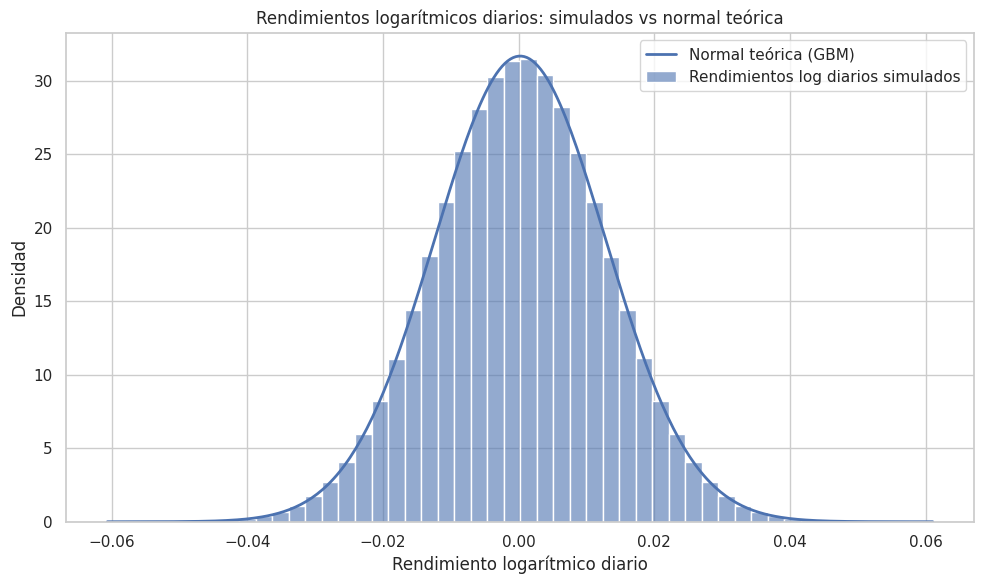

In [5]:
# =====================================================
# 2) Rendimientos logarítmicos diarios: simulados vs teoría
# =====================================================

# Rendimientos logarítmicos diarios simulados
rend_log_diarios = np.log(S[:, 1:] / S[:, :-1]).ravel()

# Parámetros teóricos de los rendimientos logarítmicos diarios en un GBM
mu_diario_teorico = (mu - 0.5 * sigma**2) * dt
sigma_diario_teorico = sigma * np.sqrt(dt)

# Rango para la distribución teórica
x = np.linspace(rend_log_diarios.min(), rend_log_diarios.max(), 300)
pdf_normal_teorica = stats.norm.pdf(x, loc=mu_diario_teorico,
                                    scale=sigma_diario_teorico)

# -------------------------------
# Gráfico: histograma vs normal teórica (rend. diarios)
# -------------------------------
plt.figure(figsize=(10, 6))
sns.histplot(rend_log_diarios, bins=50, stat="density",
             alpha=0.6, label="Rendimientos log diarios simulados")

plt.plot(x, pdf_normal_teorica, linewidth=2,
         label="Normal teórica (GBM)")

plt.title("Rendimientos logarítmicos diarios: simulados vs normal teórica")
plt.xlabel("Rendimiento logarítmico diario")
plt.ylabel("Densidad")
plt.legend()
plt.tight_layout()
plt.show()



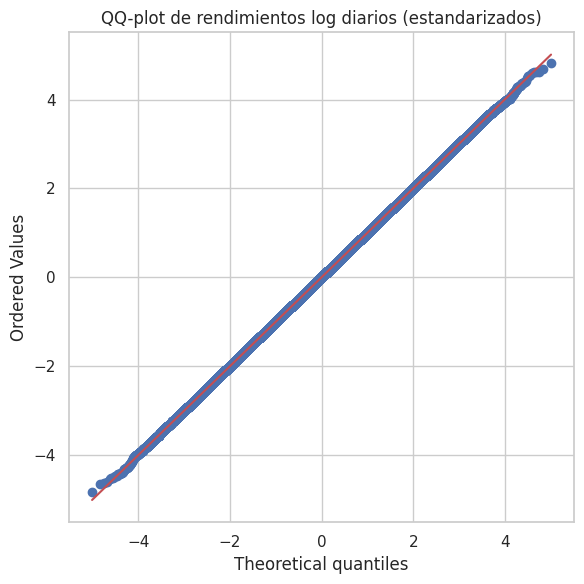

In [6]:
# =====================================================
# 3) QQ-plot para ver la normalidad de los rendimientos diarios
# =====================================================

# Estandarizamos los rendimientos con la media y desviación teórica
z = (rend_log_diarios - mu_diario_teorico) / sigma_diario_teorico

plt.figure(figsize=(6, 6))
stats.probplot(z, dist="norm", plot=plt)
plt.title("QQ-plot de rendimientos log diarios (estandarizados)")
plt.tight_layout()
plt.show()



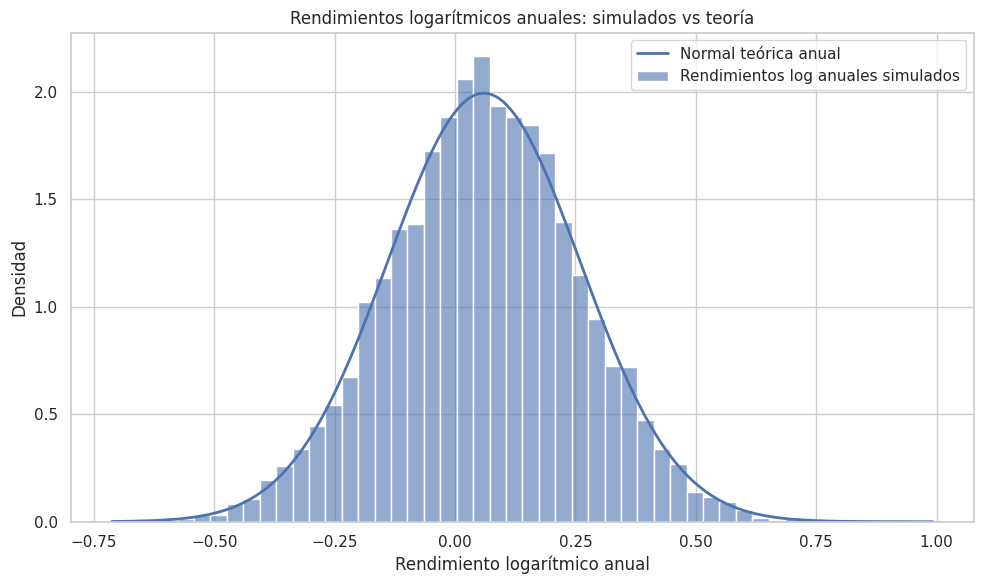

In [7]:
# =====================================================
# 4) Rendimientos logarítmicos anuales y precios finales
# =====================================================

# Rendimiento logarítmico anual (de S0 a S_T)
rend_log_anual = np.log(S[:, -1] / S[:, 0])

mu_anual_teorico = (mu - 0.5 * sigma**2) * T
sigma_anual_teorico = sigma * np.sqrt(T)

x_anual = np.linspace(rend_log_anual.min(), rend_log_anual.max(), 300)
pdf_anual_teorica = stats.norm.pdf(x_anual, loc=mu_anual_teorico,
                                   scale=sigma_anual_teorico)

plt.figure(figsize=(10, 6))
sns.histplot(rend_log_anual, bins=50, stat="density",
             alpha=0.6, label="Rendimientos log anuales simulados")

plt.plot(x_anual, pdf_anual_teorica, linewidth=2,
         label="Normal teórica anual")

plt.title("Rendimientos logarítmicos anuales: simulados vs teoría")
plt.xlabel("Rendimiento logarítmico anual")
plt.ylabel("Densidad")
plt.legend()
plt.tight_layout()
plt.show()



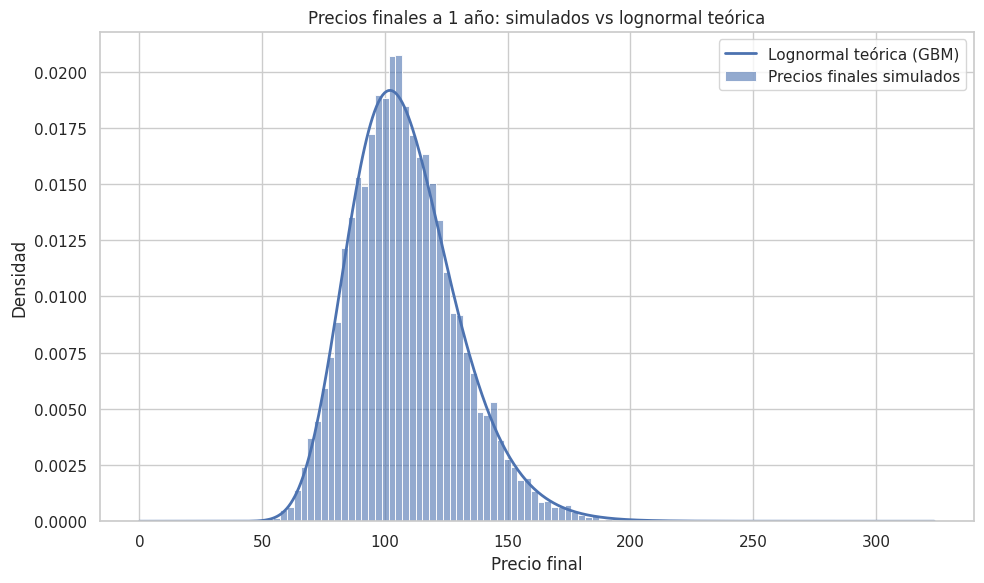

In [8]:
# =====================================================
# 5) Precios finales vs distribución lognormal teórica
# =====================================================

precios_finales = S[:, -1]

# Parámetros de la lognormal teórica
mu_log_precios = np.log(S0) + (mu - 0.5 * sigma**2) * T
sigma_log_precios = sigma * np.sqrt(T)

# En scipy, lognorm usa:
#   shape = sigma
#   scale = exp(mu)
x_precios = np.linspace(0.01, precios_finales.max() * 1.2, 400)
pdf_lognormal_teorica = stats.lognorm.pdf(
    x_precios,
    s=sigma_log_precios,
    scale=np.exp(mu_log_precios)
)

plt.figure(figsize=(10, 6))
sns.histplot(precios_finales, bins=80, stat="density",
             alpha=0.6, label="Precios finales simulados")

plt.plot(x_precios, pdf_lognormal_teorica, linewidth=2,
         label="Lognormal teórica (GBM)")

plt.title("Precios finales a 1 año: simulados vs lognormal teórica")
plt.xlabel("Precio final")
plt.ylabel("Densidad")
plt.legend()
plt.tight_layout()
plt.show()


# BLACK-SCHOLES-MERTON
Para opciones europeas

In [9]:
import numpy as np
import scipy.stats as st

# -------------------------------------------
# Fórmula de Black-Scholes-Merton para una Call Europea
# -------------------------------------------
def black_scholes_call(S0, K, r, sigma, T):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    call_price = S0 * st.norm.cdf(d1) - K * np.exp(-r*T) * st.norm.cdf(d2)
    return call_price


# Simulación Monte Carlo bajo medida neutral al riesgo

In [10]:
# -------------------------------------------
# Simulación Monte Carlo del precio de una Call Europea
# -------------------------------------------
def monte_carlo_call(S0, K, r, sigma, T, n_simulaciones=100_000):
    # Simulación de precios finales bajo medida neutral al riesgo
    Z = np.random.randn(n_simulaciones)
    ST = S0 * np.exp((r - 0.5*sigma**2)*T + sigma*np.sqrt(T)*Z)

    # Payoff de la call
    payoff = np.maximum(ST - K, 0)

    # Esperanza descontada
    precio_mc = np.exp(-r*T) * np.mean(payoff)
    return precio_mc


#Comparar: fórmula BSM vs Monte Carlo

In [11]:
# Parámetros
S0 = 100
K = 105
r = 0.05
sigma = 0.20
T = 1.0

precio_bsm = black_scholes_call(S0, K, r, sigma, T)
precio_mc = monte_carlo_call(S0, K, r, sigma, T, n_simulaciones=200_000)

precio_bsm, precio_mc


(np.float64(8.021352235143176), np.float64(7.972689125784086))

#Gráfico de convergencia

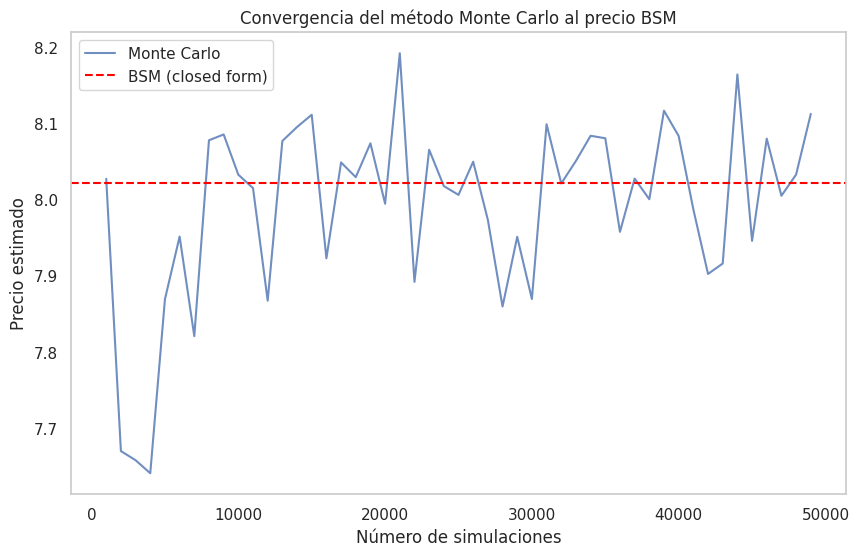

In [12]:
import matplotlib.pyplot as plt

def convergencia_monte_carlo(S0, K, r, sigma, T, n_max=50_000):
    estimaciones = []
    pasos = np.arange(1000, n_max, 1000)

    for n in pasos:
        estimaciones.append(monte_carlo_call(S0, K, r, sigma, T, n))

    return pasos, estimaciones

pasos, estimaciones = convergencia_monte_carlo(S0, K, r, sigma, T)

plt.figure(figsize=(10,6))
plt.plot(pasos, estimaciones, label="Monte Carlo", alpha=0.8)
plt.axhline(precio_bsm, color='red', linestyle='--', label="BSM (closed form)")
plt.title("Convergencia del método Monte Carlo al precio BSM")
plt.xlabel("Número de simulaciones")
plt.ylabel("Precio estimado")
plt.legend()
plt.grid()
plt.show()


#Modelo Black-Scholes-Merton con datos reales de Yahoo Finance

In [15]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

sns.set(style="whitegrid")

# -----------------------------------
# Parámetros que puedes cambiar
# -----------------------------------
ticker = "NVDA"        # activo real
periodo = "1y"          # 1 año de datos
intervalo = "1d"        # precios diarios

# Descargar datos
datos = yf.download(ticker, period=periodo, interval=intervalo, auto_adjust=False, multi_level_index=False)

datos.head()


[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-11-15,141.939285,141.979996,145.240005,140.080002,144.869995,250132900
2024-11-18,140.109802,140.149994,141.550003,137.149994,139.500000,221205300
2024-11-19,146.967850,147.009995,147.130005,140.990005,141.320007,227834900
2024-11-20,145.848175,145.889999,147.559998,142.729996,147.410004,309871700
2024-11-21,146.627960,146.669998,152.889999,140.699997,149.350006,400946600


#Calcular volatilidad histórica

In [16]:
# Rendimientos logarítmicos diarios
rend = np.log(datos["Close"] / datos["Close"].shift(1)).dropna()

# Volatilidad anualizada
sigma_hist = rend.std() * np.sqrt(252)

sigma_hist


np.float64(0.5020019258968084)

#Parámetros para el modelo BSM con datos reales

In [17]:
S0 = datos["Close"][-1]       # Precio spot actual
K = S0 * 1.05                 # Ejemplo: strike 5% OTM
r = 0.05                      # Tasa libre de riesgo (aprox)
T = 30 / 365                  # 30 días hasta expiración

sigma = sigma_hist            # volatilidad estimada


/tmp/ipython-input-2229829605.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S0 = datos["Close"][-1]       # Precio spot actual


#Fórmula Black-Scholes-Merton

In [18]:
def black_scholes_call(S0, K, r, sigma, T):
    d1 = (np.log(S0 / K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S0 * norm.cdf(d1) - K*np.exp(-r*T) * norm.cdf(d2)

precio_bsm_real = black_scholes_call(S0, K, r, sigma, T)
precio_bsm_real


np.float64(7.346187939018563)

#Monte Carlo bajo medida neutral al riesgo

In [19]:
def monte_carlo_call(S0, K, r, sigma, T, n=100_000):
    Z = np.random.randn(n)
    ST = S0 * np.exp((r - 0.5*sigma**2)*T + sigma*np.sqrt(T)*Z)
    payoff = np.maximum(ST - K, 0)
    return np.exp(-r*T) * payoff.mean()

precio_mc_real = monte_carlo_call(S0, K, r, sigma, T)
precio_mc_real


np.float64(7.387018411671336)

#Mostrar ambos precios

In [20]:
print(" Modelo BSM (analítico):", round(precio_bsm_real, 4))
print(" Monte Carlo (simulación):", round(precio_mc_real, 4))
print(" Diferencia absoluta:", round(abs(precio_bsm_real - precio_mc_real), 4))


 Modelo BSM (analítico): 7.3462
 Monte Carlo (simulación): 7.387
 Diferencia absoluta: 0.0408


#Gráfica de convergencia Monte Carlo

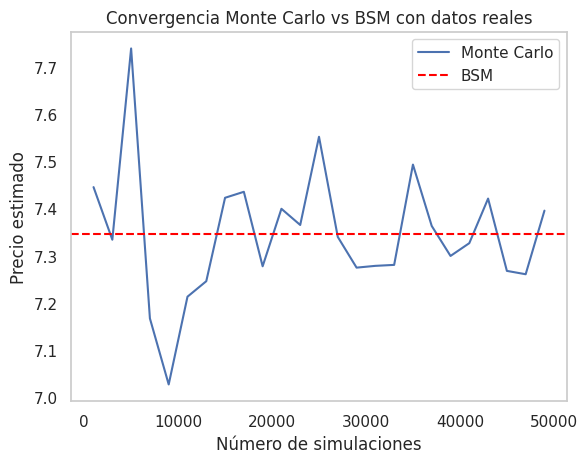

In [21]:
def convergencia(S0, K, r, sigma, T, n_max=50_000):
    estimaciones = []
    pasos = np.arange(1000, n_max, 2000)

    for n in pasos:
        estimaciones.append(monte_carlo_call(S0, K, r, sigma, T, n))

    return pasos, estimaciones

pasos, est = convergencia(S0, K, r, sigma, T)

plt.plot(pasos, est, label="Monte Carlo")
plt.axhline(precio_bsm_real, color="red", linestyle="--", label="BSM")
plt.title("Convergencia Monte Carlo vs BSM con datos reales")
plt.xlabel("Número de simulaciones")
plt.ylabel("Precio estimado")
plt.legend()
plt.grid()
plt.show()
